### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

In [2]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=4)
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [9]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(metrics.classification_report(y_test, clf.predict(x_test)))
print(metrics.confusion_matrix(y_test, clf.predict(x_test),labels=y_train))

Acuuracy:  0.9644444444444444
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.95      0.95      0.95        39
           2       1.00      0.98      0.99        48
           3       0.98      0.93      0.95        43
           4       1.00      0.95      0.98        42
           5       0.96      0.96      0.96        49
           6       1.00      0.95      0.97        39
           7       0.98      1.00      0.99        49
           8       0.88      0.98      0.92        43
           9       0.96      0.96      0.96        50

   micro avg       0.96      0.96      0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 49  0]
 [ 0  0  0 ...  1  1 48]]


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[47  0  0  0  0  0  0  0  1  0]
 [ 1 37  0  1  0  0  0  0  0  0]
 [ 1  0 47  0  0  0  0  0  0  0]
 [ 0  1  0 40  0  0  0  0  2  0]
 [ 0  0  0  0 40  2  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  2]
 [ 0  0  0  0  0  0 37  0  2  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0  1  1 48]]


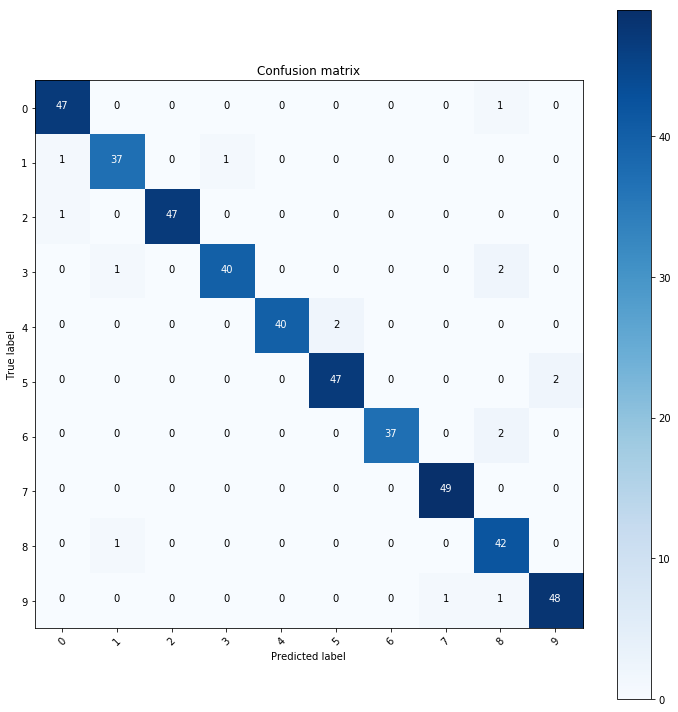

In [14]:
fig = plt.figure(figsize=(10,10))

cnf_matrix = metrics.confusion_matrix(y_test, clf.predict(x_test))
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plot_confusion_matrix(cnf_matrix, classes=target_names) #注意：targeet_names必須和confusion_matrix中labels的順序一致
plt.show()